In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('laptop_prices.csv')
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [4]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [18]:
# 找出資料缺失的地方
missing_values = df.isnull().sum()
print("缺失值數量:\n", missing_values)
# 找出數據中的不合理值
inconsistent_values = df[(df['Price_euros'] <= 0) | (df['Weight'] <= 0) | (df['CPU_freq'] <= 0)]
print("不合理數據數量:\n", inconsistent_values)

缺失值數量:
 Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
Price_twd               0
dtype: int64
不合理數據數量:
 Empty DataFrame
Columns: [Company, Product, TypeName, Inches, Ram, OS, Weight, Price_euros, Screen, ScreenW, ScreenH, Touchscreen, IPSpanel, RetinaDisplay, CPU_company, CPU_freq, CPU_model, PrimaryStorage, SecondaryStorage, PrimaryStorageType, SecondaryStorageType, GPU_company, GPU_model, Price_twd]
Index: []

[0 rows x 24 columns]


In [5]:
df['Price_twd'] = df['Price_euros'] * 35
df['Price_twd']

0       46889.15
1       31462.90
2       20125.00
3       88810.75
4       63126.00
          ...   
1270    22330.00
1271    52465.00
1272     8015.00
1273    26740.00
1274    12915.00
Name: Price_twd, Length: 1275, dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [6]:
df['OS'].unique() #找出可能有誤的系統以及不想分析的欄位


array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [18]:
mask = df['OS'] != 'Mac OS X' and df['OS'] != 'Android' and  df['OS'] != 'Windows 10 S'
df2 = df[mask]
df2.info()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [34]:
mask = (df['OS'] != 'No OS') & (df['OS'] != 'Mac OS X') & (df['OS'] != 'Android') & (df['OS'] != 'Windows 10 S')
df2 = df[mask]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 0 to 1274
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1191 non-null   object 
 1   Product               1191 non-null   object 
 2   TypeName              1191 non-null   object 
 3   Inches                1191 non-null   float64
 4   Ram                   1191 non-null   int64  
 5   OS                    1191 non-null   object 
 6   Weight                1191 non-null   float64
 7   Price_euros           1191 non-null   float64
 8   Screen                1191 non-null   object 
 9   ScreenW               1191 non-null   int64  
 10  ScreenH               1191 non-null   int64  
 11  Touchscreen           1191 non-null   object 
 12  IPSpanel              1191 non-null   object 
 13  RetinaDisplay         1191 non-null   object 
 14  CPU_company           1191 non-null   object 
 15  CPU_freq              1191

In [7]:
#另一種寫法
mask = ~df['OS'].isin(['No OS','Mac OS X','Android','Windows 10 S'])
df_OS_clear = df[mask]
df_OS_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 0 to 1274
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1191 non-null   object 
 1   Product               1191 non-null   object 
 2   TypeName              1191 non-null   object 
 3   Inches                1191 non-null   float64
 4   Ram                   1191 non-null   int64  
 5   OS                    1191 non-null   object 
 6   Weight                1191 non-null   float64
 7   Price_euros           1191 non-null   float64
 8   Screen                1191 non-null   object 
 9   ScreenW               1191 non-null   int64  
 10  ScreenH               1191 non-null   int64  
 11  Touchscreen           1191 non-null   object 
 12  IPSpanel              1191 non-null   object 
 13  RetinaDisplay         1191 non-null   object 
 14  CPU_company           1191 non-null   object 
 15  CPU_freq              1191

In [40]:
df_OS_clear.drop('Price_euros',axis = 1,inplace = True)
df_OS_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1191 non-null   object 
 1   Product               1191 non-null   object 
 2   TypeName              1191 non-null   object 
 3   Inches                1191 non-null   float64
 4   Ram                   1191 non-null   int64  
 5   OS                    1191 non-null   object 
 6   Weight                1191 non-null   float64
 7   Screen                1191 non-null   object 
 8   ScreenW               1191 non-null   int64  
 9   ScreenH               1191 non-null   int64  
 10  Touchscreen           1191 non-null   object 
 11  IPSpanel              1191 non-null   object 
 12  RetinaDisplay         1191 non-null   object 
 13  CPU_company           1191 non-null   object 
 14  CPU_freq              1191 non-null   float64
 15  CPU_model             1191

C:\Users\t1275\AppData\Local\Temp\ipykernel_84672\844686541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OS_clear.drop('Price_euros',axis = 1,inplace = True)


In [41]:
df_OS_clear.to_csv('laptop_OS_clear.csv',index = False)

In [8]:
price_summary = df_OS_clear.groupby(['Company','TypeName'])['Price_twd'].mean().reset_index()
price_summary

,Company,TypeName,Price_twd
0,Acer,2 in 1 Convertible,24456.293750
1,Acer,Gaming,51384.375000
2,Acer,Netbook,10710.000000
3,Acer,Notebook,19136.203947
4,Acer,Ultrabook,31167.500000
5,Apple,Ultrabook,61237.076923
6,Asus,2 in 1 Convertible,34173.488462
7,Asus,Gaming,61057.022115
8,Asus,Netbook,8456.000000
9,Asus,Notebook,22219.884167


In [13]:
# 設定中文字體
plt.rcParams["font.family"] = "Microsoft YaHei"
plt.rcParams["font.size"] = 16

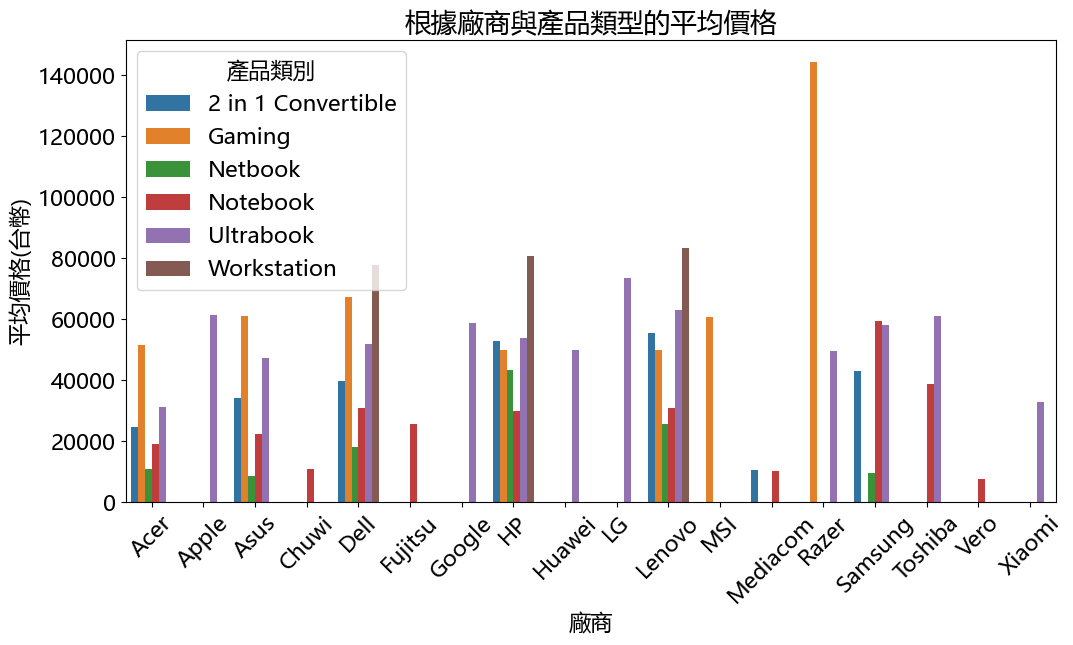

In [14]:
# 產品分類與品牌的長條圖
plt.figure(figsize=(12, 6))
sns.barplot(data=price_summary, x='Company', y='Price_twd', hue='TypeName')
plt.title('根據廠商與產品類型的平均價格')
plt.xticks(rotation=45)
plt.ylabel('平均價格(台幣)')
plt.xlabel('廠商')
plt.legend(title='產品類別')
plt.show()

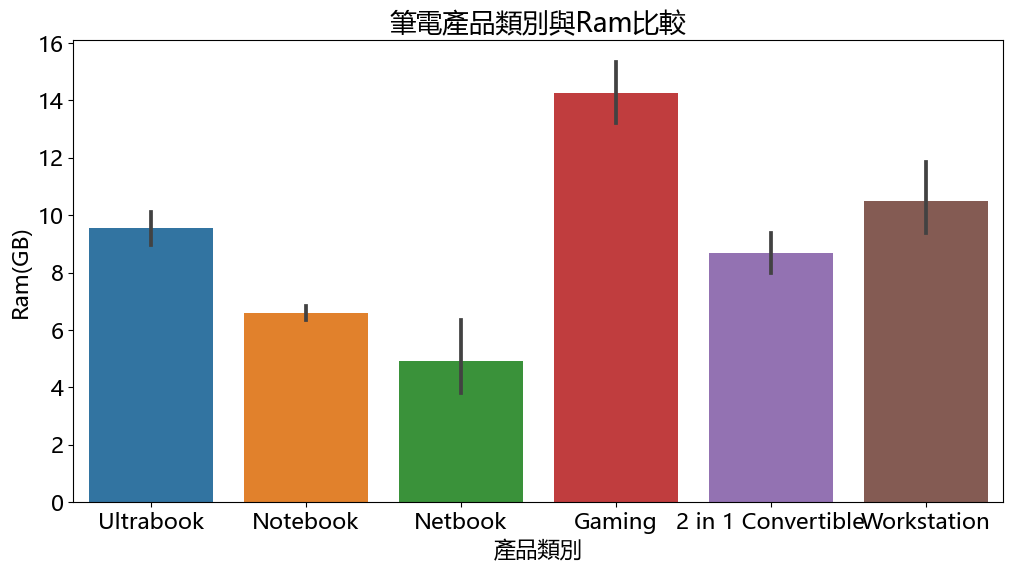

In [17]:
# 根據產品類別與與ram大小做比較
plt.figure(figsize=(12, 6))
sns.barplot(x = 'TypeName',y ='Ram',data = df_OS_clear)
plt.title('筆電產品類別與Ram比較')
plt.xlabel('產品類別')
plt.ylabel('Ram(GB)')
plt.show()

<Axes: xlabel='Company'>

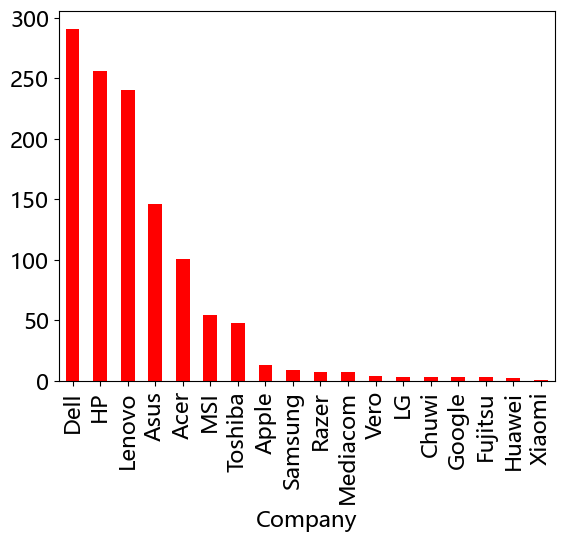

In [42]:
df_OS_clear['Company'].value_counts().plot(kind = 'bar' ,color = 'red')

<Axes: xlabel='OS'>

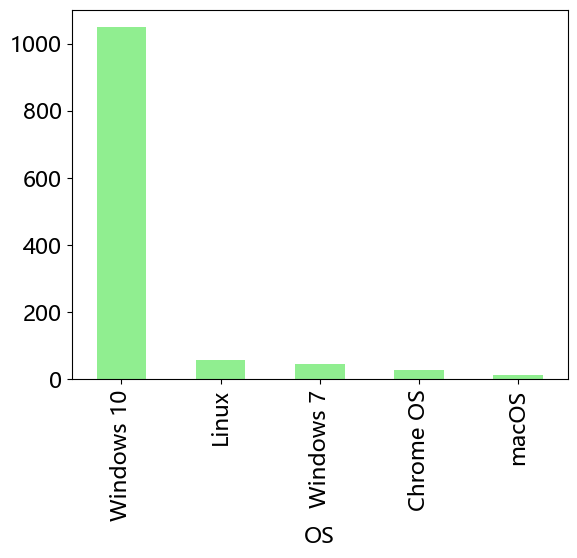

In [43]:
df_OS_clear['OS'].value_counts().plot(kind='bar',color='lightgreen')

In [44]:
ram_price_avg = df_OS_clear.groupby('Ram')['Price_twd'].mean().reset_index()

In [46]:
ram_price_avg2 = df_OS_clear.groupby('Ram').agg({'Price_twd': 'mean'}).reset_index()

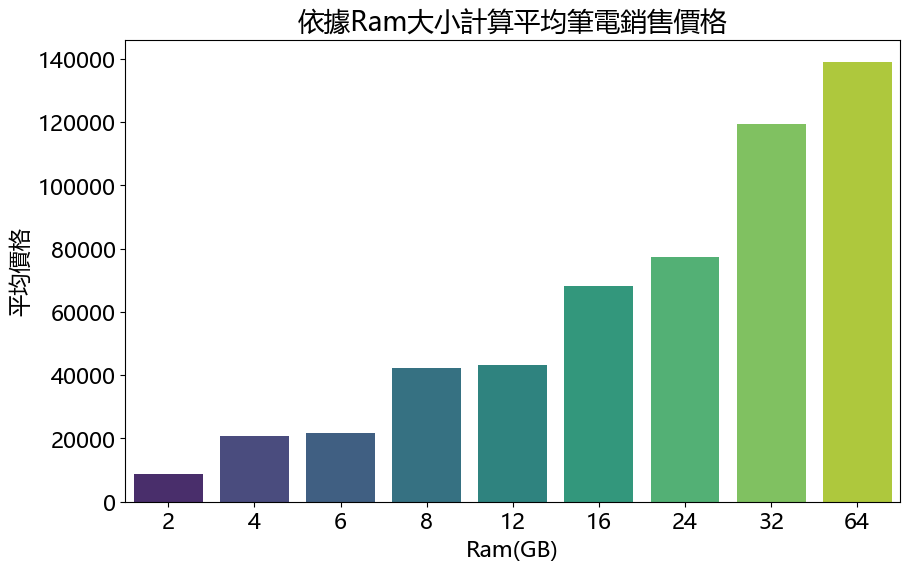

In [45]:
plt.figure(figsize=(10, 6))  
# palette調色盤參數 可放hls,viridis 
sns.barplot(x = 'Ram', y = 'Price_twd' ,data = ram_price_avg,palette = 'viridis')
plt.title("依據Ram大小計算平均筆電銷售價格")
plt.xlabel('Ram(GB)')
plt.ylabel('平均價格')
plt.show()

In [54]:
ram_price_sum = df_OS_clear.groupby('Ram')['Price_twd'].sum().reset_index()

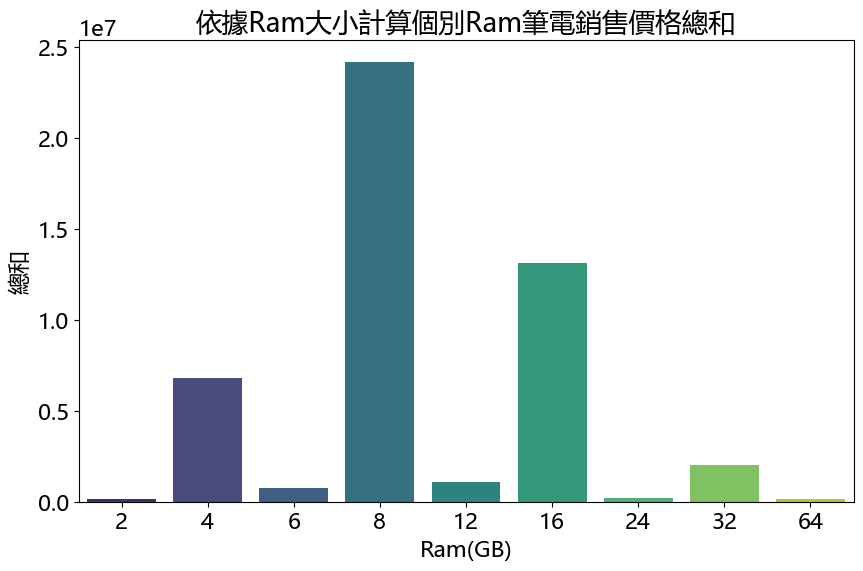

In [55]:
plt.figure(figsize=(10, 6))  
# palette調色盤參數 可放hls,viridis 
sns.barplot(x = 'Ram', y = 'Price_twd' ,data = ram_price_sum,palette = 'viridis')
plt.title("依據Ram大小計算個別Ram筆電銷售價格總和")
plt.xlabel('Ram(GB)')
plt.ylabel('總和')
plt.show()

In [49]:
company_price_avg = df_OS_clear.groupby('Company')['Price_twd'].mean().reset_index()

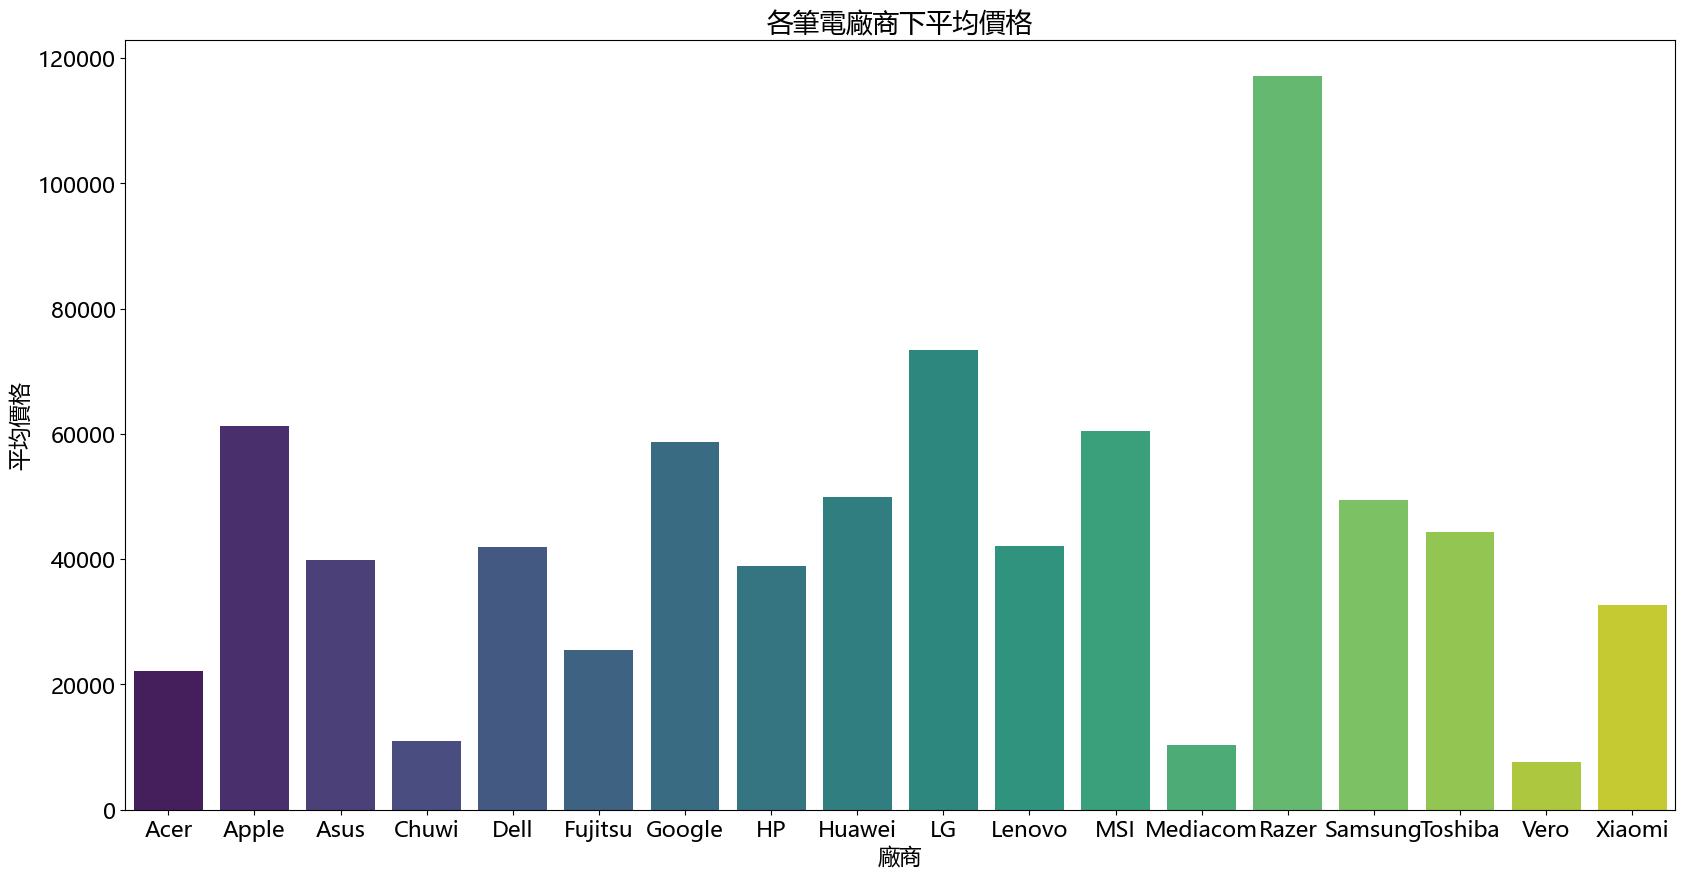

In [52]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Company', y='Price_twd', data = company_price_avg, palette = 'viridis')
plt.title('各筆電廠商下平均價格')
plt.xlabel('廠商')
plt.ylabel('平均價格')
plt.show()

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. 讀取資料
df = pd.read_csv("laptop_OS_clear.csv")

# 2. 數據預處理
#   a. 處理類別型特徵 (使用 Label Encoding)
categorical_features = ['Company', 'Product', 'TypeName', 'OS', 'Screen', 
                         'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay',
                         'CPU_company', 'CPU_model', 'PrimaryStorageType',
                         'SecondaryStorageType', 'GPU_company', 'GPU_model']

for col in categorical_features:
    if col in df.columns:
         le = LabelEncoder()
         df[col] = le.fit_transform(df[col].astype(str))  # 將可能為文字的資料型態轉換成特定數字做分類

#   b. 處理數值型特徵 (使用 StandardScaler)
#  處理資料中數值型的特徵。先將這些特徵轉換成數字，並處理可能存在的缺失值。將所有數值特徵的值縮放到相似的範圍，這樣可以讓機器學習模型更好地學習這些特徵，並且提升模型的預測準確度。
numerical_features = ['Inches', 'Ram', 'Weight', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

for col in numerical_features:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].mean(), inplace=True)


scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(df[numerical_features])
numerical_features_scaled = pd.DataFrame(numerical_features_scaled, columns=numerical_features)
df[numerical_features] = numerical_features_scaled


#  c. 特徵選擇 (將目標變數 Price_twd 移出特徵)
target = 'Price_twd'
features = df.drop(target, axis=1).columns

# 3. 分割資料集 (訓練集、測試集)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 建立並訓練模型 (Linear Regression, Random Forest, Gradient Boosting)
#   a. 線性迴歸模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#   b. 隨機森林迴歸模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#   c. 梯度提升機迴歸模型
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [45]:
# 5. 模型評估 (均方誤差 MSE, R2分數)
#   a. 線性迴歸模型
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)
r2_lr_train = r2_score(y_train, y_pred_lr_train)
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
r2_lr_test = r2_score(y_test, y_pred_lr_test)
print("線性迴歸模型:")
print(f"  訓練集 MSE: {mse_lr_train:.2f}")
print(f"  訓練集 R2 : {r2_lr_train:.2f}")
print(f"  測試集 MSE: {mse_lr_test:.2f}")
print(f"  測試集 R2 : {r2_lr_test:.2f}")

線性迴歸模型:
  訓練集 MSE: 172742429.98
  訓練集 R2 : 0.72
  測試集 MSE: 157754706.49
  測試集 R2 : 0.75


In [47]:
#   b. 隨機森林迴歸模型
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)
mse_rf_train = mean_squared_error(y_train, y_pred_rf_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)
mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)
print("隨機森林迴歸模型:")
print(f"  訓練集 MSE: {mse_rf_train:.2f}")
print(f"  訓練集 R2 : {r2_rf_train:.2f}")
print(f"  測試集 MSE: {mse_rf_test:.2f}")
print(f"  測試集 R2 : {r2_rf_test:.2f}")

隨機森林迴歸模型:
  訓練集 MSE: 13199950.09
  訓練集 R2 : 0.98
  測試集 MSE: 83984442.25
  測試集 R2 : 0.86


In [48]:
#   c. 梯度提升機迴歸模型
y_pred_gb_train = gb_model.predict(X_train)
y_pred_gb_test = gb_model.predict(X_test)
mse_gb_train = mean_squared_error(y_train, y_pred_gb_train)
r2_gb_train = r2_score(y_train, y_pred_gb_train)
mse_gb_test = mean_squared_error(y_test, y_pred_gb_test)
r2_gb_test = r2_score(y_test, y_pred_gb_test)
print("梯度提升機迴歸模型:")
print(f"  訓練集 MSE: {mse_gb_train:.2f}")
print(f"  訓練集 R2 : {r2_gb_train:.2f}")
print(f"  測試集 MSE: {mse_gb_test:.2f}")
print(f"  測試集 R2 : {r2_gb_test:.2f}")

梯度提升機迴歸模型:
  訓練集 MSE: 41046003.26
  訓練集 R2 : 0.93
  測試集 MSE: 92708804.56
  測試集 R2 : 0.85


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. 讀取資料
df = pd.read_csv("laptop_OS_clear.csv")

# 2. 數據預處理
#   a. 處理類別型特徵 (使用 Label Encoding)
categorical_features = ['Company', 'Product', 'TypeName', 'OS', 'Screen', 
                         'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay',
                         'CPU_company', 'CPU_model', 'PrimaryStorageType',
                         'SecondaryStorageType', 'GPU_company', 'GPU_model']

for col in categorical_features:
    if col in df.columns:
         le = LabelEncoder()
         df[col] = le.fit_transform(df[col].astype(str))  # 处理缺失值和未知值

#   b. 處理數值型特徵 (使用 StandardScaler)
numerical_features = ['Inches', 'Ram', 'Weight','CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

for col in numerical_features:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].mean(), inplace=True)


scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(df[numerical_features])
numerical_features_scaled = pd.DataFrame(numerical_features_scaled, columns=numerical_features)
df[numerical_features] = numerical_features_scaled


#  c. 特徵選擇 (將目標變數 Price_twd 移出特徵)
target = 'Price_twd'
features = df.drop(target, axis=1).columns

# 3. 分割資料集 (訓練集、測試集)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 建立並訓練模型 (Linear Regression, Random Forest, Gradient Boosting)
#   a. 線性迴歸模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#   b. 隨機森林迴歸模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#   c. 梯度提升機迴歸模型
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# 5. 模型評估 (均方誤差 MSE, R2分數)
#   a. 線性迴歸模型
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("線性迴歸模型:")
print(f"  MSE: {mse_lr:.2f}")
print(f"  R2 : {r2_lr:.2f}")

#   b. 隨機森林迴歸模型
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("隨機森林迴歸模型:")
print(f"  MSE: {mse_rf:.2f}")
print(f"  R2 : {r2_rf:.2f}")


#   c. 梯度提升機迴歸模型
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("梯度提升機迴歸模型:")
print(f"  MSE: {mse_gb:.2f}")
print(f"  R2 : {r2_gb:.2f}")

線性迴歸模型:
  MSE: 157754706.49
  R2 : 0.75
隨機森林迴歸模型:
  MSE: 83984442.25
  R2 : 0.86
梯度提升機迴歸模型:
  MSE: 92708804.56
  R2 : 0.85
